# Importing libraries

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

# Initialization

In [2]:
iterations = 40
k = 20
regularization_factor = 0.1     #lambda
learning_rate= 0.01
data_path = "ratings.csv"

### Plot Function

In [3]:
def plot_error(error,title,xlabel,ylabel):
    fig = plt.figure(figsize=(14,8))
    plt.gca().set_xticks(list(range(1,len(error)+1)))
    plt.plot(list(range(1,len(error)+1)),error)
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.show()

# Latent Factor Recommender

In [4]:
def latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k):
    
    P = np.random.uniform(low=0, high=np.sqrt(5/k), size=(1,k))    # For movies
    Q = np.random.uniform(low=0, high=np.sqrt(5/k), size=(1,k))    # For users

    error_list = []
    for i in range(iterations):
        with open(data_path) as f:
            for line in f:
                line = np.fromstring(line,dtype=int,sep=',')

                movie_id = line[0]
                user_id = line[1]
                rating = line[2]

                if (movie_id+1 > P.shape[0]):
                    P = np.append(P, np.random.uniform(low=0, high=np.sqrt(5/k), size=(movie_id+1-P.shape[0],k)), axis = 0)

                if (user_id+1 > Q.shape[0]):
                    Q = np.append(Q, np.random.uniform(low=0, high=np.sqrt(5/k), size=(user_id+1-Q.shape[0],k)), axis = 0)

                # derivative of error
                err_der = 2*(rating - np.dot(np.array([Q[user_id]]),  np.array([P[movie_id]]).T)[0][0])

                # updating q and p
                q = Q[user_id] + learning_rate * (err_der*P[movie_id] - 2*regularization_factor*Q[user_id])

                p = P[movie_id] + learning_rate * (err_der*Q[user_id] - 2*regularization_factor*P[movie_id])

                Q[user_id] = q
                P[movie_id] = p            

        # predicting ratings
        R_pred = np.dot(P,Q.T)

        # Calculating error
        E1 = 0
        with open(data_path) as f:
            for line in f:
                line = np.fromstring(line,dtype=int,sep=',')

                movie_id = line[0]
                user_id = line[1]
                rating = line[2]

                E1 = E1 + np.square(rating - R_pred[movie_id, user_id])

        p_norm = np.sum(np.square(np.linalg.norm(P,ord=2,axis=1)))
        q_norm = np.sum(np.square(np.linalg.norm(Q,ord=2,axis=1)))

        error = E1 + regularization_factor * (p_norm + q_norm)

        error_list.append(error)

        print("Iteration ",i," : ",error)
        
    return [error_list, P, Q]

In [5]:
recommender_list = latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k)

Iteration  0  :  173391.88561156465
Iteration  1  :  95746.73354537481
Iteration  2  :  90401.64311154616
Iteration  3  :  87892.45865082718
Iteration  4  :  86115.98429652397
Iteration  5  :  84558.08655965482
Iteration  6  :  83012.5545990584
Iteration  7  :  81381.41608630578
Iteration  8  :  79631.83494693191
Iteration  9  :  77781.78325416858
Iteration  10  :  75879.16675912015
Iteration  11  :  73975.44273057388
Iteration  12  :  72109.7072271088
Iteration  13  :  70307.28895718559
Iteration  14  :  68584.26404545695
Iteration  15  :  66951.05903214528
Iteration  16  :  65414.00515086995
Iteration  17  :  63975.91138771882
Iteration  18  :  62636.5241350414
Iteration  19  :  61393.14453893221
Iteration  20  :  60241.342094670195
Iteration  21  :  59175.629014307524
Iteration  22  :  58190.00587765346
Iteration  23  :  57278.353562000855
Iteration  24  :  56434.6882762758
Iteration  25  :  55653.3124292851
Iteration  26  :  54928.89382614044
Iteration  27  :  54256.49888726809
Ite

In [6]:
Error_list = recommender_list[0]
P = recommender_list[1]
Q = recommender_list[2]

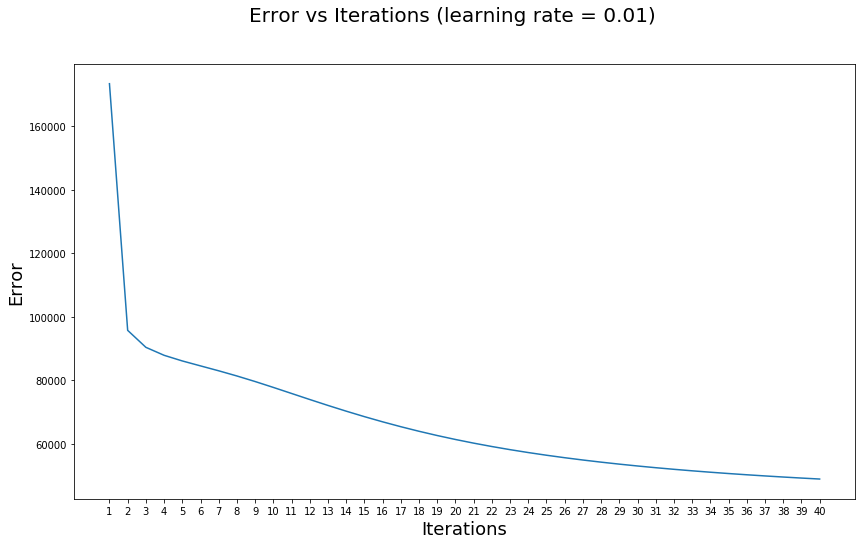

In [7]:
plot_error(Error_list,"Error vs Iterations (learning rate = "+str(learning_rate)+")","Iterations","Error")

# Recommending for a User

In [14]:
user_id = 13
movie_id = 10

In [16]:
recommendation = int(np.dot(P[user_id],Q[movie_id].T))
print("The recommendation for the user ",user_id,"for movie ",movie_id,"is: ", recommendation)

The recommendation for the user  13 for movie  10 is:  4
